In [4]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read the data
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/Cars.csv')
df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [3]:
df.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


In [3]:
#Data visualization

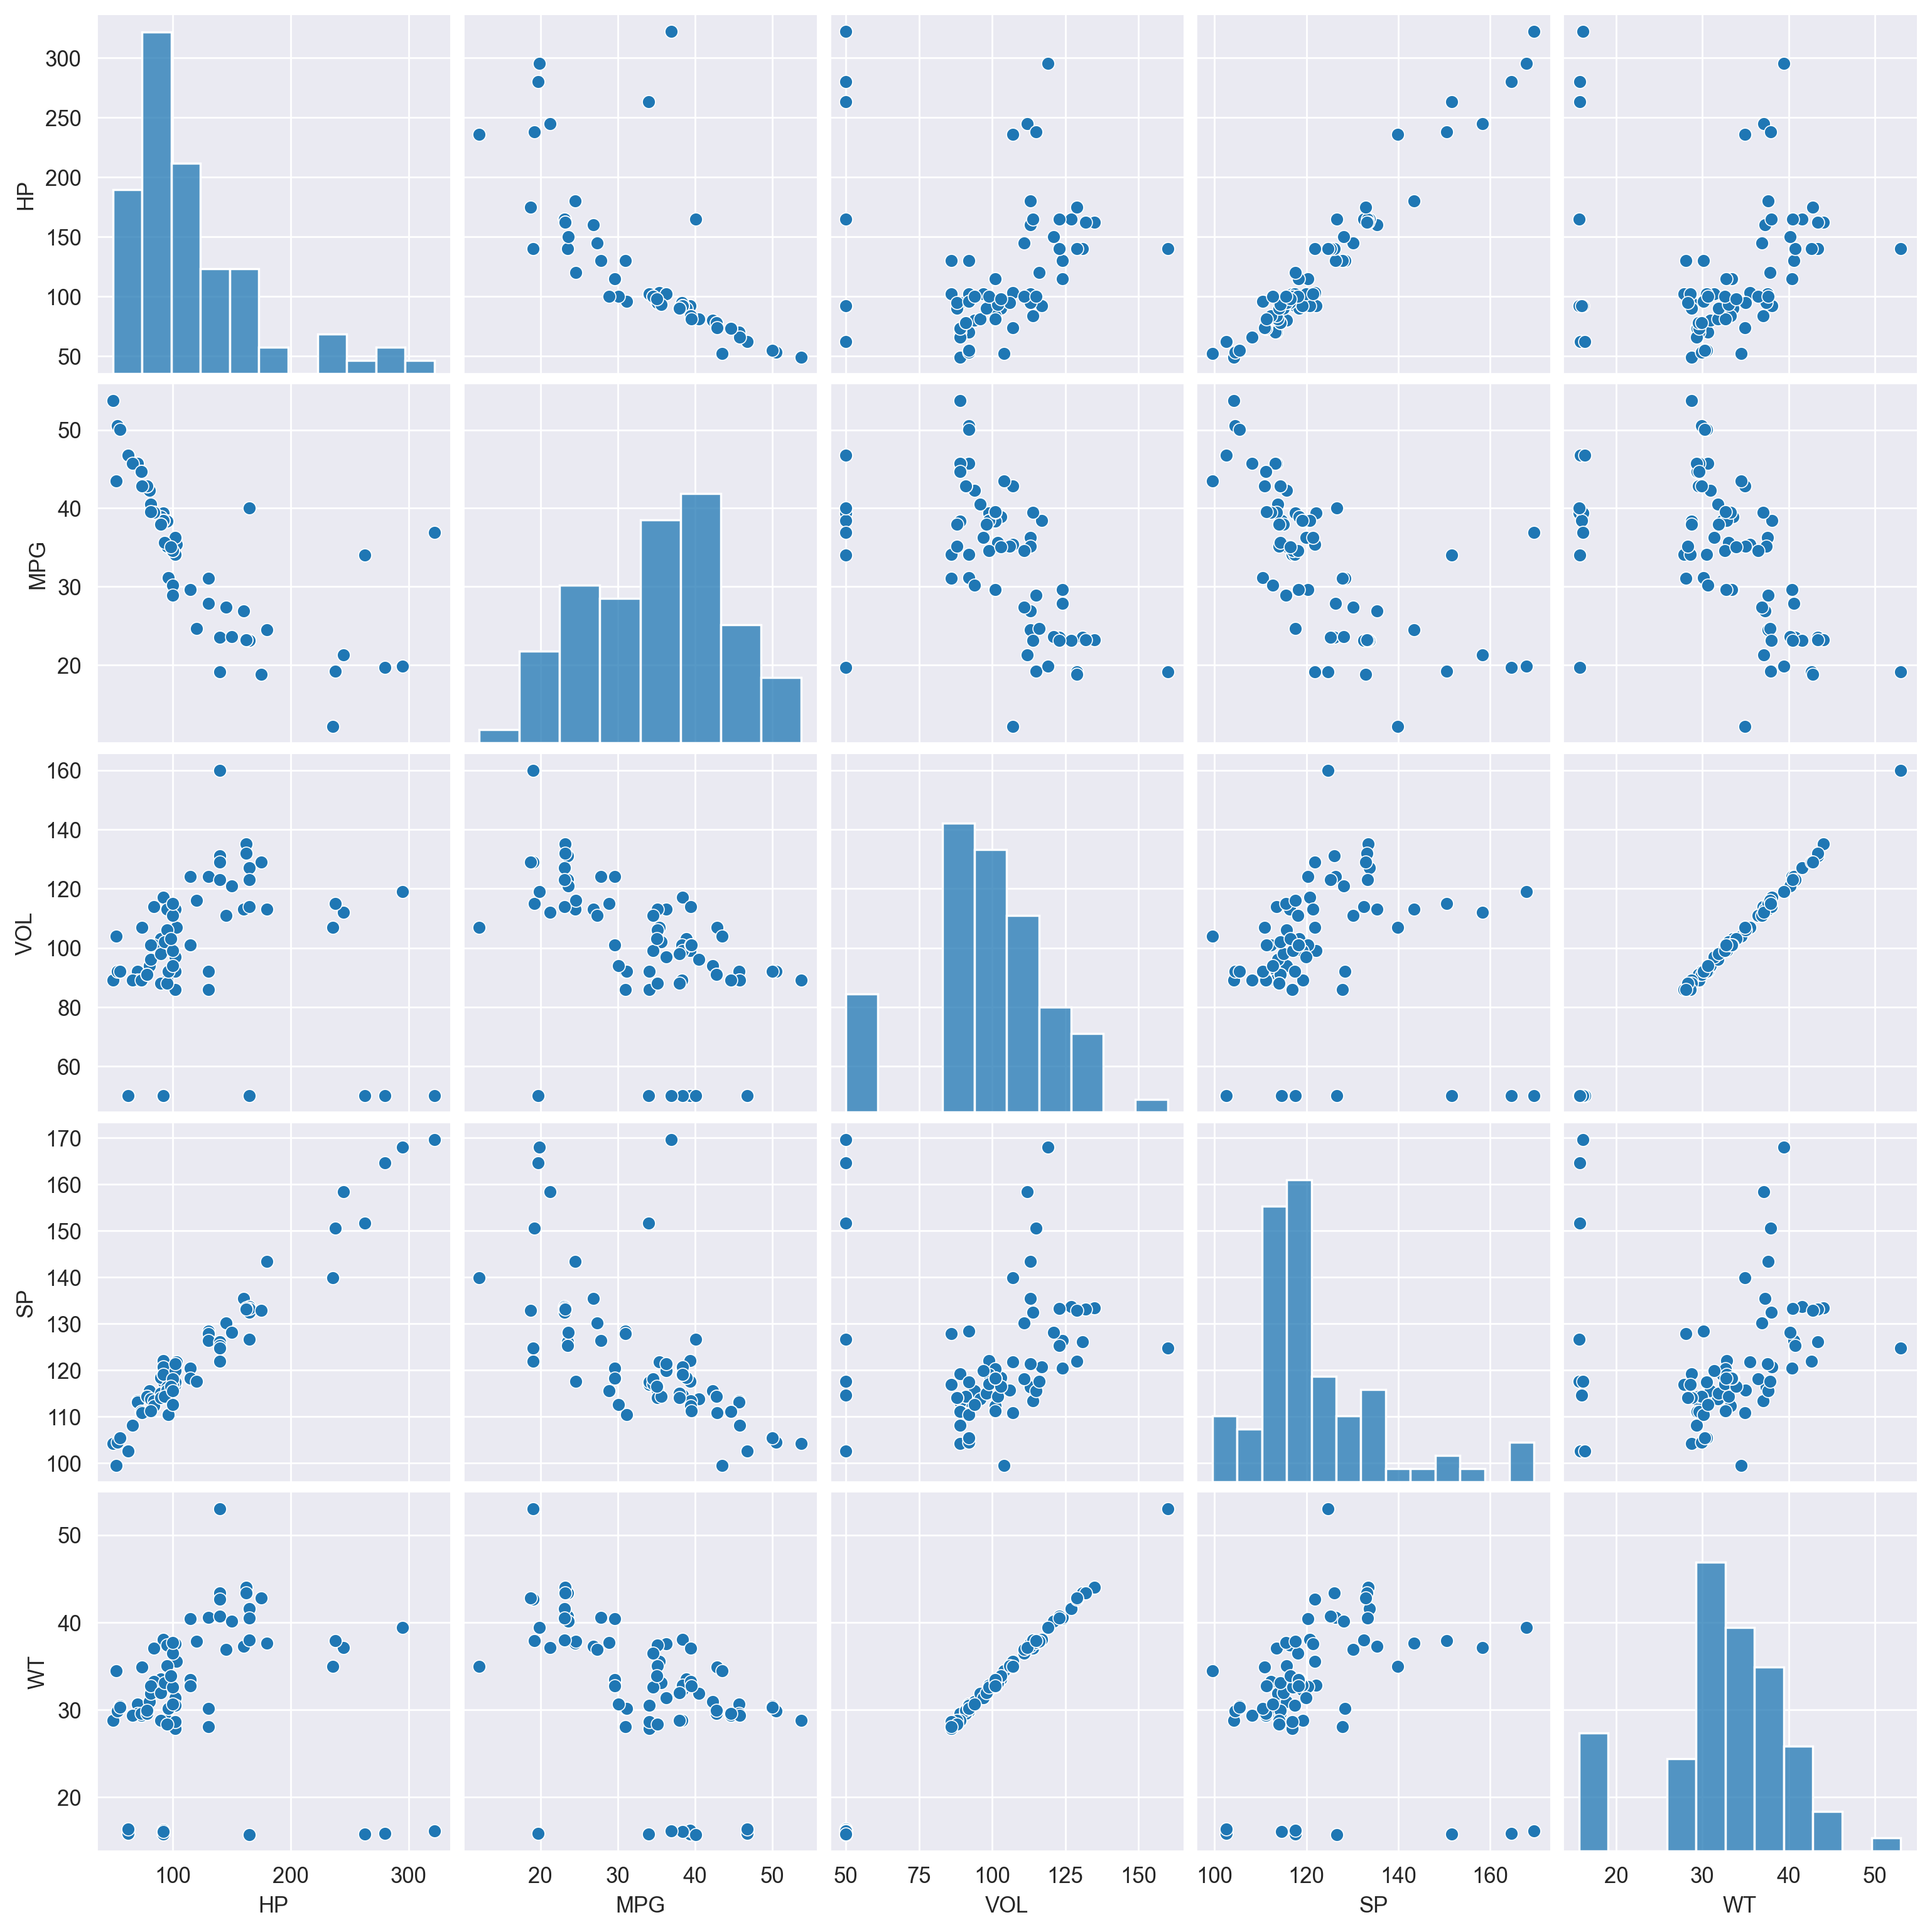

In [5]:
sns.pairplot(df)

In [4]:
#Correlation

<AxesSubplot:>

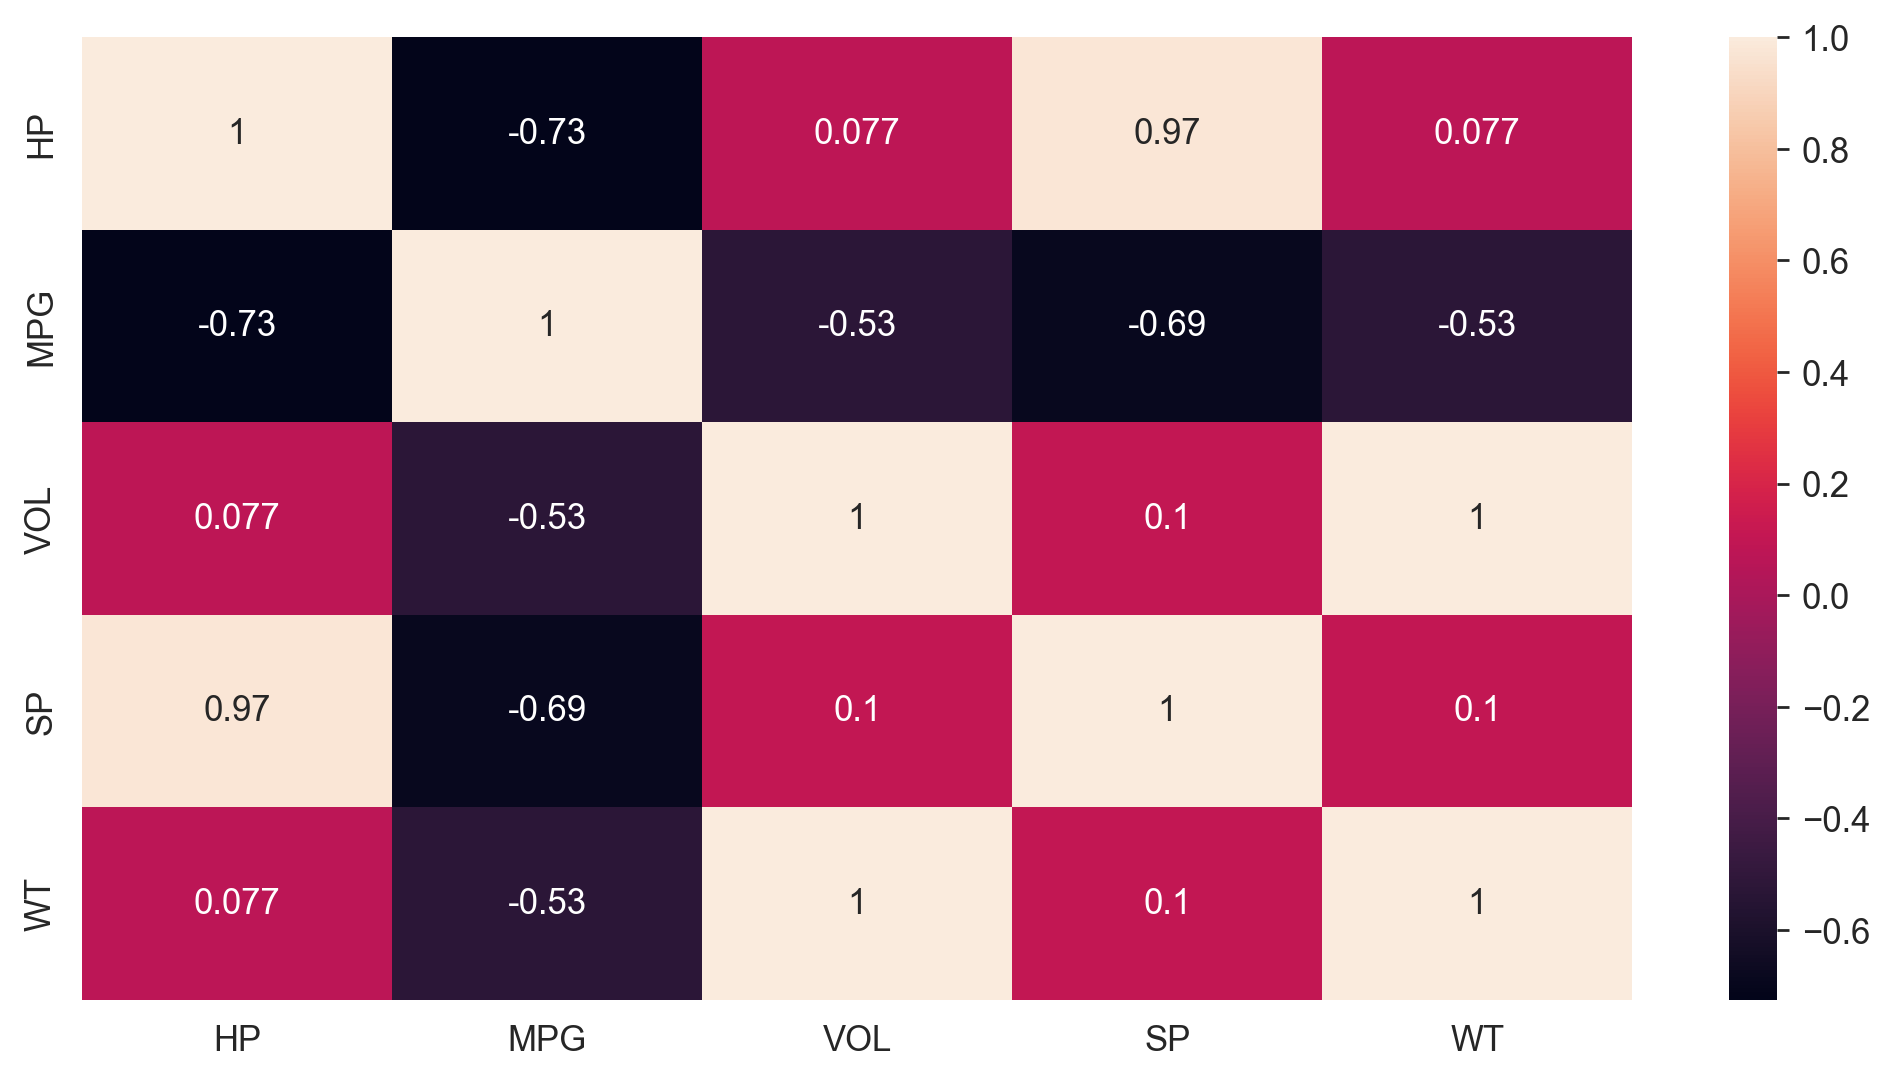

In [6]:
sns.heatmap(df.corr(),annot=True)

# Model Building

In [7]:
import statsmodels.formula.api as smf

In [8]:
model = smf.ols('MPG~HP+VOL+SP+WT',data=df).fit()

In [9]:
model.pvalues

Intercept    0.042936
HP           0.000001
VOL          0.556294
SP           0.014579
WT           0.813649
dtype: float64

# Simple Linear Regression

In [10]:
#Wt
wt = smf.ols('MPG~WT+HP+SP',data = df).fit()
wt.pvalues

Intercept    5.053995e-02
WT           1.914892e-13
HP           7.560276e-07
SP           1.089096e-02
dtype: float64

In [11]:
#vol
vol = smf.ols('MPG~VOL+SP+HP',data = df).fit()
vol.pvalues

Intercept    4.194554e-02
VOL          1.648229e-13
SP           1.207855e-02
HP           8.644870e-07
dtype: float64

# Calculate VIF

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [15]:
df.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [16]:
data = df.drop(columns=['MPG'])
data

,HP,VOL,SP,WT
0,49,89,104.185353,28.762059
1,55,92,105.461264,30.466833
2,55,92,105.461264,30.193597
3,70,92,113.461264,30.632114
4,53,92,104.461264,29.889149
...,...,...,...,...
76,322,50,169.598513,16.132947
77,238,115,150.576579,37.923113
78,263,50,151.598513,15.769625
79,295,119,167.944460,39.423099


In [22]:
data.values

array([[ 49.        ,  89.        , 104.1853528 ,  28.7620589 ],
       [ 55.        ,  92.        , 105.4612635 ,  30.46683298],
       [ 55.        ,  92.        , 105.4612635 ,  30.19359657],
       [ 70.        ,  92.        , 113.4612635 ,  30.63211391],
       [ 53.        ,  92.        , 104.4612635 ,  29.88914864],
       [ 70.        ,  89.        , 113.1853528 ,  29.59176832],
       [ 55.        ,  92.        , 105.4612635 ,  30.30847957],
       [ 62.        ,  50.        , 102.5985128 ,  15.84775807],
       [ 62.        ,  50.        , 102.5985128 ,  16.35948352],
       [ 80.        ,  94.        , 115.6452041 ,  30.92015417],
       [ 73.        ,  89.        , 111.1853528 ,  29.36334142],
       [ 92.        ,  50.        , 117.5985128 ,  15.75353468],
       [ 92.        ,  99.        , 122.1050553 ,  32.81359241],
       [ 73.        ,  89.        , 111.1853528 ,  29.3784363 ],
       [ 66.        ,  89.        , 108.1853528 ,  29.34727902],
       [ 73.        ,  89

In [23]:
vif = pd.DataFrame()
vif

""


In [24]:
vif['Features'] = data.columns
vif

,Features
0,HP
1,VOL
2,SP
3,WT


In [26]:
range(len(data.columns))

range(0, 4)

In [27]:
vif['VIF'] = [variance_inflation_factor(data.values,i) for i in range(len(data.columns))]

In [28]:
vif

,Features,VIF
0,HP,11.191296
1,VOL,12708.789369
2,SP,50.541968
3,WT,12172.827328


# Subset Selection

AIC

In [30]:
#wt
wt = smf.ols('MPG~WT+HP+SP',data = df).fit()
wt.rsquared, wt.aic

(0.769482813998346, 476.29927501529767)

In [33]:
#vol
vol = smf.ols('MPG~VOL+SP+HP',data = df).fit()
vol.rsquared, vol.aic

(0.770368341321302, 475.9875158854609)

# MODEL VALIDATION TECHNIQUES

# 1.Residual Analysis


**As per the subset selection, it is clear that VOL column is more important than WT column as it's R2 value is more and AIC value is less,So we will select VOL columns and will drop WT column.**

**NORMALITY TEST**

In [8]:
#Statsmodel


In [9]:
#Q-Q plot


In [10]:
#get index for higher residuals

# 2. Residual plot of Homoscedasticity

- Homoscedasticity can be checked by plotting a scatter plot between fitted values and residuals.

# 3.Residual VS Regressor

In [11]:
#Vol


In [12]:
#Sp


In [13]:
#Hp


# MODEL DELETION TECHNIQUES

# Cook's Distance
   - **Detecting influencers and outliers**

In [14]:
#Find the influence data
#Calculate the cooks distance

In [15]:
# Cook's distance plot


In [16]:
#Influence Plot


In [17]:
#Calculate cutoff


# Improving the model

In [18]:
#reset the index

In [19]:
# Cook's distance plot


In [20]:
#Final Model


**Since the value is <1 , we can stop the diagnostic process and finalize the model**

# Predicting for new records